In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('dataset1.csv')
print(data.shape)
data.head()

(27, 57)


,Name,Web Main All Origin Links,Web Main First Party Links,Web Main Objects,Web Main Images,Web Main JS,Web Main HTML,Web Main CSS,Web Main First party Objects,Web Main First party Images,...,Mobile Mini JS,Mobile Mini HTML,Mobile Mini CSS,Mobile Mini First party Objects,Mobile Mini First party Images,Mobile Mini First party JS,Mobile Mini First party HTML,Mobile Mini First party CSS,Mobile Mini Distinct First party servers,Mobile Mini Distinct All servers
0,imgur.com,72,70,72,44,6,3,6,70,44,...,0,6,0,5,0,0,4,0,1,4
1,adobe.com,49,29,31,7,15,1,5,29,6,...,0,4,0,5,0,0,4,0,1,2
2,whatsapp.com,53,51,51,15,22,3,8,51,15,...,0,4,0,5,0,0,4,0,1,2
3,office.com,39,22,25,13,3,2,2,22,11,...,0,4,0,5,0,0,4,0,1,2
4,pornhub.com,100,0,79,51,21,0,7,0,0,...,0,5,0,6,0,0,5,0,1,2


In [3]:
NormMMini = pd.DataFrame(data,columns = ['Name','Mobile Mini All Origin Links','Mobile Mini First Party Links','Mobile Mini Objects', 'Mobile Mini Images','Mobile Mini JS','Mobile Mini HTML','Mobile Mini CSS','Mobile Mini First party Objects','Mobile Mini First party Images','Mobile Mini First party JS','Mobile Mini First party HTML','Mobile Mini First party CSS','Mobile Mini Distinct First party servers','Mobile Mini Distinct All servers'])
NormMMain = pd.DataFrame(data, columns=['Name','Mobile Main All Origin Links','Mobile Main First Party Links','Mobile Main Objects', 'Mobile Main Images','Mobile Main JS','Mobile Main HTML','Mobile Main CSS','Mobile Main First party Objects','Mobile Main First party Images','Mobile Main First party JS','Mobile Main First party HTML','Mobile Main First party CSS','Mobile Main Distinct First party servers','Mobile Main Distinct All servers'])
NormWMain = pd.DataFrame(data, columns=['Name','Web Main All Origin Links','Web Main First Party Links','Web Main Objects', 'Web Main Images','Web Main JS','Web Main HTML','Web Main CSS','Web Main First party Objects','Web Main First party Images','Web Main First party JS','Web Main First party HTML','Web Main First party CSS','Web Main Distinct First party servers','Web Main Distinct All servers'])
NormWMini = pd.DataFrame(data, columns=['Name','Web Mini All Origin Links','Web Mini First Party Links','Web Mini Objects', 'Web Mini Images','Web Mini JS','Web Mini HTML','Web Mini CSS','Web Mini First party Objects','Web Mini First party Images','Web Mini First party JS','Web Mini First party HTML','Web Mini First party CSS','Web Mini Distinct First party servers','Web Mini Distinct All servers'])

In [4]:
NormWMini['Non_Origin_Links'] = NormWMini['Web Mini All Origin Links'] - NormWMini['Web Mini First Party Links']
NormWMain['Non_Origin_Links'] = NormWMain['Web Main All Origin Links'] - NormWMain['Web Main First Party Links']
NormMMain['Non_Origin_Links'] = NormMMain['Mobile Main All Origin Links'] - NormMMain['Mobile Main First Party Links']
NormMMini['Non_Origin_Links'] = NormMMini['Mobile Mini All Origin Links'] - NormMMini['Mobile Mini First Party Links']
NormWMini['Distinct_Non_Origin'] = NormWMini['Web Mini Distinct All servers'] - NormWMini['Web Mini Distinct First party servers']
NormWMain['Distinct_Non_Origin'] = NormWMain['Web Main Distinct All servers'] - NormWMain['Web Main Distinct First party servers']
NormMMain['Distinct_Non_Origin'] = NormMMain['Mobile Main Distinct All servers'] - NormMMain['Mobile Main Distinct First party servers']
NormMMini['Distinct_Non_Origin'] = NormMMini['Mobile Mini Distinct All servers'] - NormMMini['Mobile Mini Distinct First party servers']

In [5]:
NormMMini['Non_Origin'] = NormMMini['Non_Origin_Links']/NormMMini['Mobile Mini All Origin Links']
NormMMain['Non_Origin'] = NormMMain['Non_Origin_Links']/NormMMain['Mobile Main All Origin Links']
NormMMini['Origin'] = NormMMini['Mobile Mini First Party Links']/NormMMini['Mobile Mini All Origin Links']
NormMMain['Origin'] = NormMMain['Mobile Main First Party Links']/NormMMain['Mobile Main All Origin Links']
NormMMini['Non_OriginD'] = NormMMini['Distinct_Non_Origin']/NormMMini['Mobile Mini Distinct All servers']
NormMMain['Non_OriginD'] = NormMMain['Distinct_Non_Origin']/NormMMain['Mobile Main Distinct All servers']
NormMMini['OriginD'] = NormMMini['Mobile Mini Distinct First party servers']/NormMMini['Mobile Mini Distinct All servers']
NormMMain['OriginD'] = NormMMain['Mobile Main Distinct First party servers']/NormMMain['Mobile Main Distinct All servers']
NormMMini['html'] = NormMMini['Mobile Mini HTML']/NormMMini['Mobile Mini Objects']
NormMMini['js'] = NormMMini['Mobile Mini JS']/NormMMini['Mobile Mini Objects']
NormMMini['css'] = NormMMini['Mobile Mini CSS']/NormMMini['Mobile Mini Objects']
NormMMini['img'] = NormMMini['Mobile Mini Images']/NormMMini['Mobile Mini Objects']
NormMMain['html'] = NormMMain['Mobile Main HTML']/NormMMain['Mobile Main Objects']
NormMMain['js'] = NormMMain['Mobile Main JS']/NormMMain['Mobile Main Objects']
NormMMain['css'] = NormMMain['Mobile Main CSS']/NormMMain['Mobile Main Objects']
NormMMain['img'] = NormMMain['Mobile Main Images']/NormMMain['Mobile Main Objects']


In [6]:
Mini = pd.DataFrame(NormMMini, columns = ['Name','Origin','Non_Origin','Distinct_Non_Origin','Non_OriginD','html','css','js','img','Mobile Mini Distinct First party servers'])
Main = pd.DataFrame(NormMMain, columns = ['Name','Origin','Non_Origin','Distinct_Non_Origin','Non_OriginD','html','css','js','img','Mobile Main Distinct First party servers'])

In [7]:
def cdfplot(ser,t,x,y,l,h):
    ser = ser.sort_values()
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ser_cdf.plot(drawstyle='steps')
    plt.title(t)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xlim(l,h)
    plt.show()

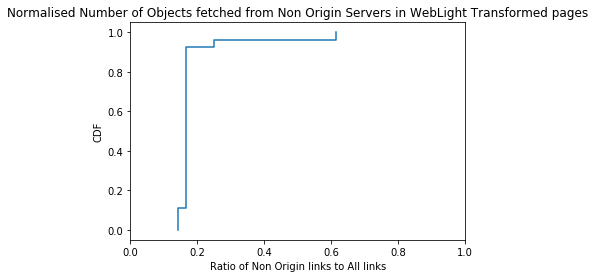

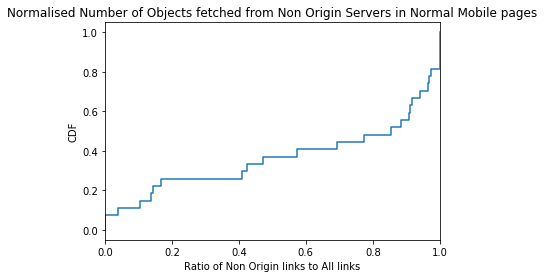

In [16]:
title = "Normalised Number of Objects fetched from Non Origin Servers in WebLight Transformed pages"
ylabel = 'CDF'
xlabel = 'Ratio of Non Origin links to All links'
cdfplot(Mini['Non_Origin'],title,xlabel,ylabel,0,1)
title = "Normalised Number of Objects fetched from Non Origin Servers in Normal Mobile pages"
ylabel = 'CDF'
# xlabel = 'Number of pages'
cdfplot(Main['Non_Origin'],title,xlabel,ylabel,0,1)

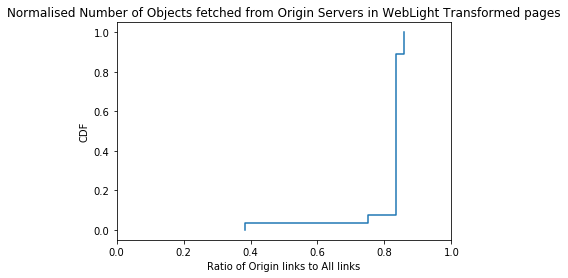

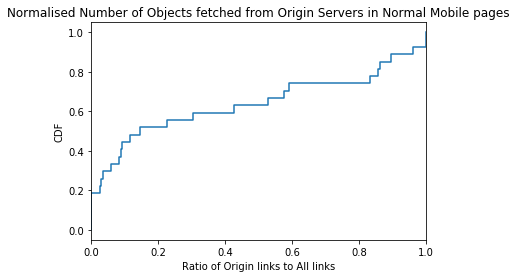

In [9]:
title = "Normalised Number of Objects fetched from Origin Servers in WebLight Transformed pages"
ylabel = 'CDF'
xlabel = 'Ratio of Origin links to All links'
cdfplot(Mini['Origin'],title,xlabel,ylabel,0,1)
title = "Normalised Number of Objects fetched from Origin Servers in Normal Mobile pages"
ylabel = 'CDF'
# xlabel = 'Number of pages'
cdfplot(Main['Origin'],title,xlabel,ylabel,0,1)

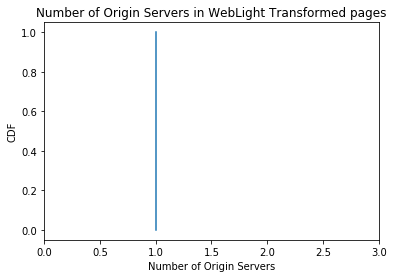

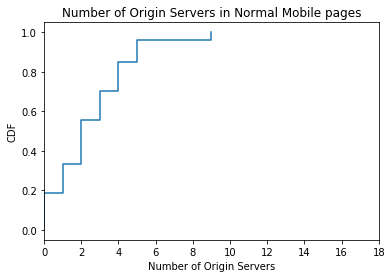

In [10]:
title = "Number of Origin Servers in WebLight Transformed pages"
ylabel = 'CDF'
xlabel = 'Number of Origin Servers'
cdfplot(Mini['Mobile Mini Distinct First party servers'],title,xlabel,ylabel,0,3)
title = "Number of Origin Servers in Normal Mobile pages"
ylabel = 'CDF'
cdfplot(Main['Mobile Main Distinct First party servers'],title,xlabel,ylabel,0,18)

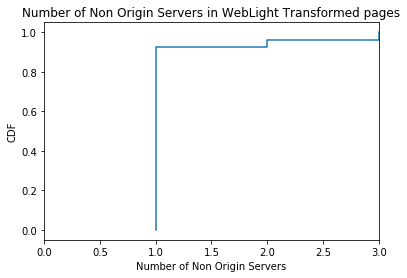

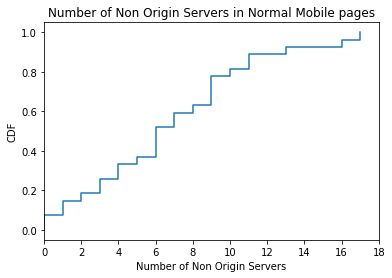

In [11]:
title = "Number of Non Origin Servers in WebLight Transformed pages"
ylabel = 'CDF'
xlabel = 'Number of Non Origin Servers'
cdfplot(Mini['Distinct_Non_Origin'],title,xlabel,ylabel,0,3)
title = "Number of Non Origin Servers in Normal Mobile pages"
ylabel = 'CDF'
cdfplot(Main['Distinct_Non_Origin'],title,xlabel,ylabel,0,18)

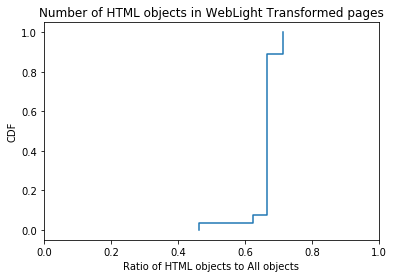

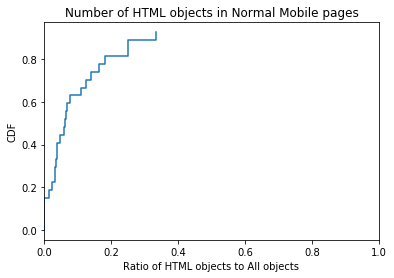

In [12]:
title = "Number of HTML objects in WebLight Transformed pages"
ylabel = 'CDF'
xlabel = 'Ratio of HTML objects to All objects'
cdfplot(Mini['html'],title,xlabel,ylabel,0,1)
title = "Number of HTML objects in Normal Mobile pages"
ylabel = 'CDF'
cdfplot(Main['html'],title,xlabel,ylabel,0,1)

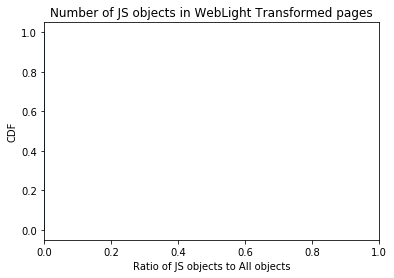

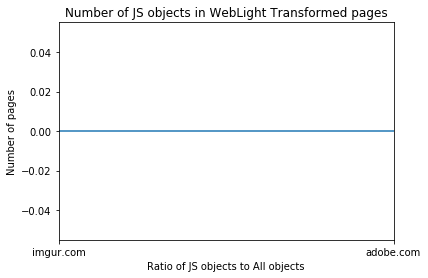

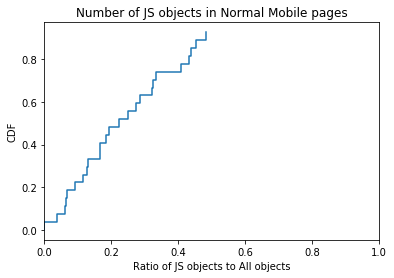

In [13]:
title = "Number of JS objects in WebLight Transformed pages"
ylabel = 'CDF'
xlabel = 'Ratio of JS objects to All objects'
cdfplot(Mini['js'],title,xlabel,ylabel,0,1)
plt.plot(Mini['Name'],Mini['js'])
plt.title("Number of JS objects in WebLight Transformed pages")
plt.xlabel('Ratio of JS objects to All objects')
plt.ylabel('Number of pages')
plt.xlim(0,1)
plt.show()
title = "Number of JS objects in Normal Mobile pages"
ylabel = 'CDF'
cdfplot(Main['js'],title,xlabel,ylabel,0,1)

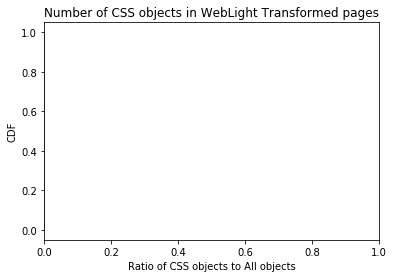

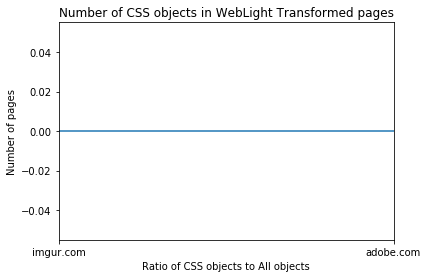

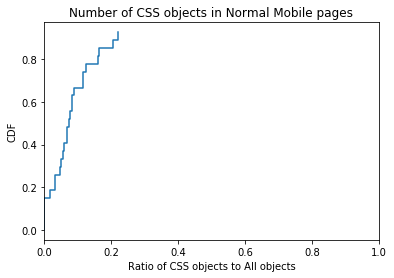

In [14]:
title = "Number of CSS objects in WebLight Transformed pages"
ylabel = 'CDF'
xlabel = 'Ratio of CSS objects to All objects'
cdfplot(Mini['css'],title,xlabel,ylabel,0,1)
plt.plot(Mini['Name'],Mini['css'])
plt.title("Number of CSS objects in WebLight Transformed pages")
plt.xlabel('Ratio of CSS objects to All objects')
plt.ylabel('Number of pages')
plt.xlim(0,1)
plt.show()
title = "Number of CSS objects in Normal Mobile pages"
ylabel = 'CDF'
cdfplot(Main['css'],title,xlabel,ylabel,0,1)

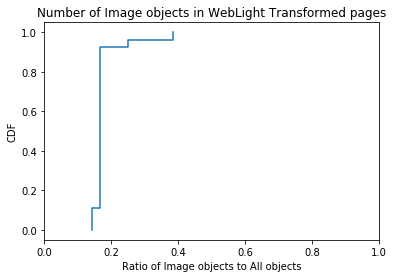

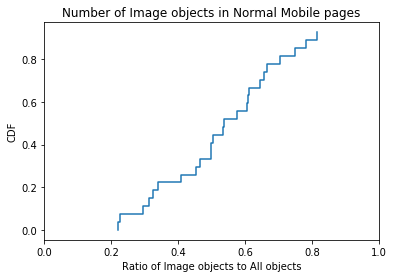

In [15]:
title = "Number of Image objects in WebLight Transformed pages"
ylabel = 'CDF'
xlabel = 'Ratio of Image objects to All objects'
cdfplot(Mini['img'],title,xlabel,ylabel,0,1)
title = "Number of Image objects in Normal Mobile pages"
ylabel = 'CDF'
cdfplot(Main['img'],title,xlabel,ylabel,0,1)